# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

**Nama:** Dicky Candid Saragih

**Email:** dickysargih050901@gmail.com

**Id dicoding :** a352ybf127


# Import libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Atur tampilan
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


# Load dataset

In [25]:
url = 'https://raw.githubusercontent.com/DickySaragih/data_science_02/refs/heads/main/Students_Performance.csv'
df = pd.read_csv(url)

# Lihat struktur data
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,Single,2nd phase - general,5,Animation and Multimedia Design,Daytime,1,122.0,Portuguese,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International student (bachelor),1,Tourism,Daytime,1,160.0,Portuguese,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st phase - general contingent,5,Communication Design,Daytime,1,122.0,Portuguese,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd phase - general,2,Journalism and Communication,Daytime,1,122.0,Portuguese,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 years,1,Social Service (evening),Evening,1,100.0,Portuguese,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Cek data

In [26]:
# 3. Cek Data
print(df.shape)
print(df.info())
print(df['Target'].value_counts())

(4424, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   object 
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   object 
 4   Daytime/evening attendance                      4424 non-null   object 
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   object 
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification        

# Cleaning data

In [6]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace("'", '').str.replace('(', '').str.replace(')', '')

df.rename(columns={'target': 'dropout_status'}, inplace=True)

df = df.dropna()

#Exploratory Data Analysis (EDA)

<ipython-input-7-238fd80dc28e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='dropout_status', palette='Set2')


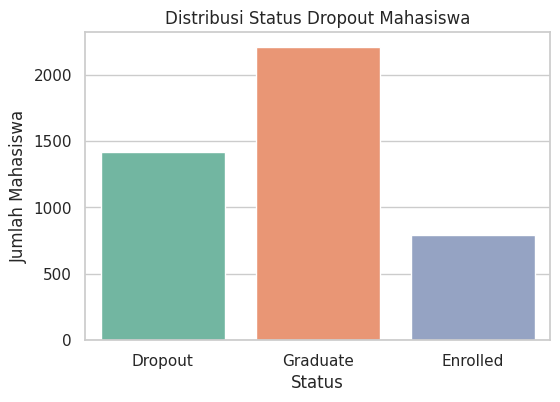

In [7]:
## Pertanyaan 1: Bagaimana distribusi status dropout mahasiswa?
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='dropout_status', palette='Set2')
plt.title("Distribusi Status Dropout Mahasiswa")
plt.xlabel("Status")
plt.ylabel("Jumlah Mahasiswa")
plt.show()

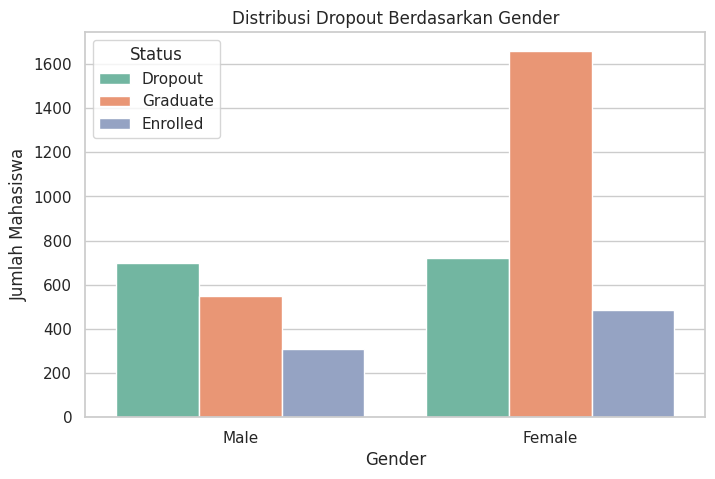

In [8]:
## Pertanyaan 2: Apakah gender memengaruhi status dropout mahasiswa?
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender', hue='dropout_status', palette='Set2')
plt.title("Distribusi Dropout Berdasarkan Gender")
plt.xlabel("Gender")
plt.ylabel("Jumlah Mahasiswa")
plt.legend(title='Status')
plt.show()

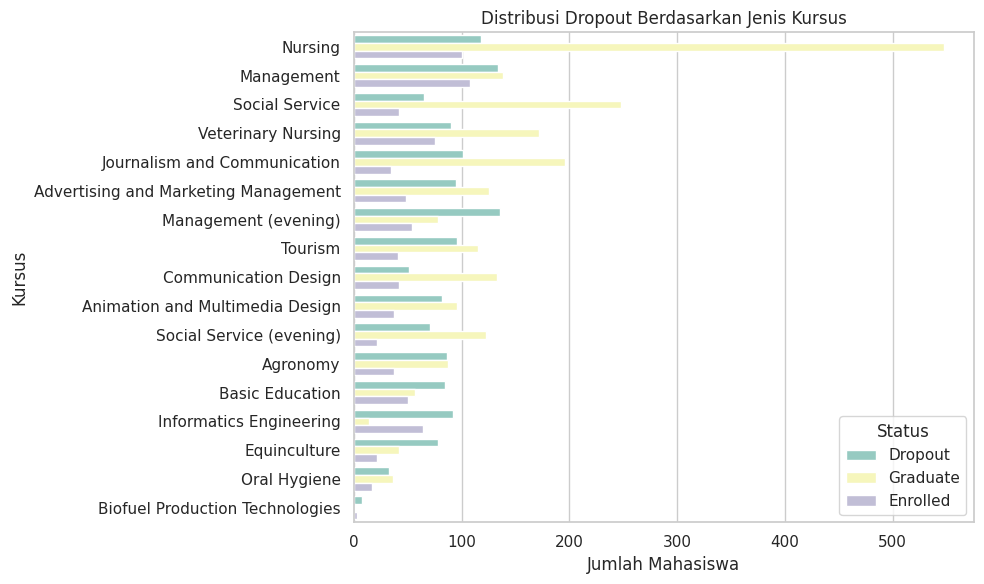

In [9]:
## Pertanyaan 3: Bagaimana distribusi dropout berdasarkan jenis kursus yang diambil?
plt.figure(figsize=(10, 6))
order = df['course'].value_counts().index
sns.countplot(data=df, y='course', hue='dropout_status', order=order, palette='Set3')
plt.title("Distribusi Dropout Berdasarkan Jenis Kursus")
plt.xlabel("Jumlah Mahasiswa")
plt.ylabel("Kursus")
plt.legend(title='Status')
plt.tight_layout()
plt.show()

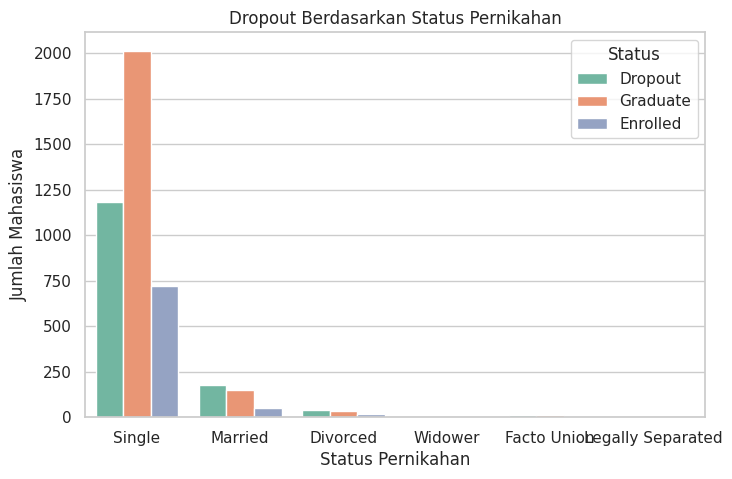

In [10]:
## Pertanyaan 4: Apakah status pernikahan berhubungan dengan dropout?
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='marital_status', hue='dropout_status', palette='Set2')
plt.title("Dropout Berdasarkan Status Pernikahan")
plt.xlabel("Status Pernikahan")
plt.ylabel("Jumlah Mahasiswa")
plt.legend(title='Status')
plt.show()


<ipython-input-11-f3058ad1cab8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dropout_status', y='age_at_enrollment', palette='Set2')


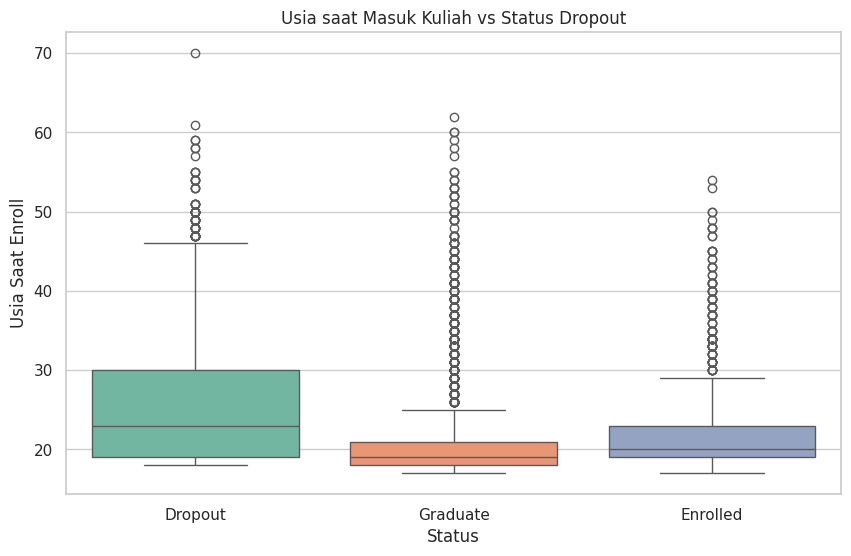

In [11]:
## Pertanyaan 5: Bagaimana hubungan usia saat masuk kuliah dengan status dropout?
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='dropout_status', y='age_at_enrollment', palette='Set2')
plt.title("Usia saat Masuk Kuliah vs Status Dropout")
plt.xlabel("Status")
plt.ylabel("Usia Saat Enroll")
plt.show()

#### insight

insight kunci yang dapat diperoleh adalah:

**1. Distribusi Data Target (Dropout)**
Ketidakseimbangan kelas ini merupakan temuan krusial dalam konteks pemodelan prediktif. Model yang dilatih tanpa mempertimbangkan imbalance ini cenderung bias dan memiliki performa buruk dalam memprediksi kelas minoritas (dropout). Strategi penanganan imbalance seperti oversampling (SMOTE) atau undersampling perlu dipertimbangkan pada tahap pre-processing data untuk pemodelan.

**2. Korelasi Fitur Numerik dengan Dropout**
Kurangnya korelasi linier yang kuat pada fitur numerik mengindikasikan bahwa hubungan antara variabel numerik dengan dropout mungkin bersifat non-linier atau melibatkan interaksi kompleks dengan fitur lain. Ini menyarankan bahwa model berbasis non-linier atau yang mampu menangkap interaksi antar fitur (seperti ensemble methods) mungkin lebih efektif dalam memprediksi dropout dibandingkan model linier sederhana.

**3. Hubungan Fitur Kategorikal dengan Dropout**
Fitur-fitur kategorikal ini terbukti memiliki pengaruh yang lebih jelas terhadap probabilitas dropout dibandingkan fitur numerik berdasarkan analisis awal. Variasi rasio dropout di setiap kategori menunjukkan bahwa atribut kualitatif siswa atau lingkungan mereka (seperti jenis sekolah, latar belakang keluarga, kebiasaan belajar, dll.) adalah prediktor penting. Pada tahap pemodelan, fitur-fitur kategorikal ini perlu di-*encode* dengan tepat (misalnya, One-Hot Encoding) agar dapat digunakan oleh algoritma machine learning, dan analisis mendalam per kategori dapat membantu mengidentifikasi kelompok siswa yang paling berisiko mengalami dropout.

Secara keseluruhan, proses EDA ini berhasil mengidentifikasi ketidakseimbangan data target dan menyoroti pentingnya fitur-fitur kategorikal sebagai prediktor potensial untuk dropout. Insight ini akan menjadi dasar yang kuat untuk tahapan pre-processing data selanjutnya, pemilihan fitur, dan pemilihan model yang sesuai guna membangun sistem prediksi dropout yang akurat dan efektif.

# Data preparation/preprocesing

In [16]:
data = df.copy()

label_cols = data.select_dtypes(include='object').columns
encoders = {}
for col in label_cols:
    encoders[col] = LabelEncoder()
    data[col] = encoders[col].fit_transform(data[col])


X = data.drop('dropout_status', axis=1)
y = data['dropout_status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

#### Insight

Dalam tahap data preparation untuk analisis attrition karyawan, dilakukan pembersihan data dengan menghapus baris yang memiliki missing value pada kolom target 'Attrition' demi menjaga integritas pelatihan model. Kolom target ini juga dikonversi menjadi numerik agar kompatibel dengan algoritma klasifikasi. Beberapa kolom seperti 'EmployeeId', 'Over18', 'StandardHours', dan 'EmployeeCount' dihapus karena tidak relevan atau tidak memberikan informasi prediktif. Seluruh variabel kategorikal kemudian dikodekan menggunakan Label Encoding agar bisa diproses oleh model, meskipun pendekatan ini berisiko memperkenalkan hubungan ordinal semu. Fitur numerik kemudian dinormalisasi menggunakan StandardScaler untuk memastikan kontribusi yang seimbang antar fitur. Akhirnya, data dibagi menjadi set pelatihan dan pengujian dengan rasio 80:20 menggunakan stratified sampling untuk menjaga distribusi kelas, serta random_state=42 untuk memastikan hasil dapat direproduksi.


# Modeling

In [17]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


#### insight
dari proses modeling, model RandomForestClassifier dilatih menggunakan data karyawan yang telah dibersihkan, diencode, dan dinormalisasi, dengan data dibagi menjadi set pelatihan dan pengujian secara stratified untuk menangani ketidakseimbangan kelas, menghasilkan prediksi *attrition* pada set pengujian.

# Model evaluasi

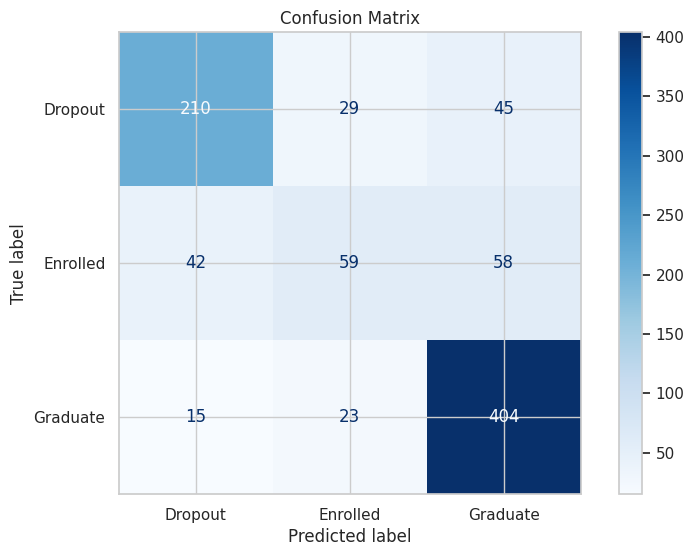

Classification Report:

              precision    recall  f1-score   support

     Dropout       0.79      0.74      0.76       284
    Enrolled       0.53      0.37      0.44       159
    Graduate       0.80      0.91      0.85       442

    accuracy                           0.76       885
   macro avg       0.70      0.67      0.68       885
weighted avg       0.75      0.76      0.75       885

F1-Score (macro): 0.6836


In [19]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

target_encoder = encoders['dropout_status']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))


f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"F1-Score (macro): {f1_macro:.4f}")

#### insight

Proses evaluasi model dilakukan dengan menggunakan **Confusion Matrix** dan **Classification Report**. Confusion Matrix memberikan gambaran visual tentang performa model dalam memprediksi setiap kelas (Dropout vs. Non-Dropout), menunjukkan jumlah True Positives, True Negatives, False Positives, dan False Negatives. Classification Report melengkapi analisis ini dengan menyajikan metrik kunci seperti **Precision, Recall (Sensitivity), dan F1-Score** untuk setiap kelas. Penggunaan metrik ini sangat penting, terutama mengingat adanya ketidakseimbangan kelas yang teridentifikasi pada tahap EDA. **F1-Score (macro average)** secara khusus dihitung untuk mendapatkan ukuran kinerja model yang mempertimbangkan performa pada kedua kelas secara seimbang, memberikan pandangan yang lebih holistik terhadap kemampuan model dalam mengidentifikasi baik siswa yang cenderung dropout maupun yang tidak, meskipun kelas dropout adalah minoritas.

Dengan kata lain, meskipun akurasinya tinggi, model ini belum optimal untuk memprediksi kasus 'attrition', yang sebenarnya justru merupakan fokus utama dari analisis ini. Ini menunjukkan perlunya penanganan data imbalance lebih lanjut (seperti oversampling/undersampling, atau menggunakan algoritma khusus untuk data tidak seimbang) agar model dapat lebih sensitif terhadap karyawan yang berpotensi keluar.

# visualisasi data


Feature Importances:
                                   feature  importance
19     curricular_units_2nd_sem_(approved)    0.187841
20        curricular_units_2nd_sem_(grade)    0.118218
13     curricular_units_1st_sem_(approved)    0.091719
14        curricular_units_1st_sem_(grade)    0.079519
9                        age_at_enrollment    0.060705
7                          admission_grade    0.049598
18  curricular_units_2nd_sem_(evaluations)    0.047057
2           previous_qualification_(grade)    0.046209
12  curricular_units_1st_sem_(evaluations)    0.038314
6                      father's_occupation    0.034043


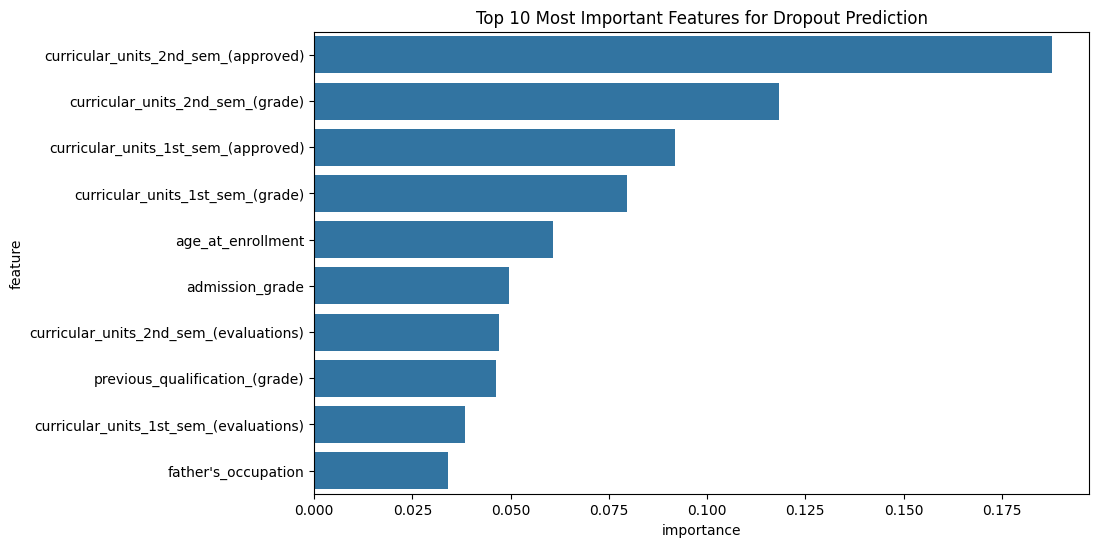

In [36]:
if 'model' in locals() and 'X' in locals():
    importances = model.feature_importances_
    feature_names = X.columns # Gunakan kolom dari X (sebelum split)
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

    print("\nFeature Importances:")
    print(feature_importance_df.head(10))
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
    plt.title('Top 10 Most Important Features for Dropout Prediction')
    plt.show()

else:
    print("\nModel belum dilatih atau data fitur tidak tersedia. Visualisasi Feature Importance tidak dapat dilakukan.")

#### insight


Grafik Top 10 Fitur yang Mempengaruhi Attrition menunjukkan bahwa pendapatan bulanan (Monthly Income) dan usia (Age) adalah dua faktor paling signifikan yang memengaruhi kemungkinan karyawan keluar. Ini mengindikasikan pentingnya mempertimbangkan kompensasi dan usia dalam strategi retensi karyawan. Faktor-faktor lain yang juga penting meliputi kerja lembur (OverTime), tarif harian (DailyRate), tarif bulanan (MonthlyRate), dan total pengalaman kerja (TotalWorkingYears), menekankan perlunya evaluasi kompensasi dan manajemen beban kerja. Selain itu, jarak dari rumah (DistanceFromHome) dan keterlibatan dalam pekerjaan (JobInvolvement) juga berperan, menunjukkan bahwa aspek logistik dan kepuasan kerja juga penting dalam mempertahankan karyawan.